This file is a notebook to perform the AL and DA loop for the moons dataset and for the normals aligner.
Follow these steps:
1) Put the parameter values in the first cell
2) Run the script
3) Find the plots in the corresponding folders


In [1]:
versionname = "aligned-random"      # The version name
original = False                    # Do you want plots of the aligned data (False) or of the original data (True)?
k = 300                             # The number of instances per bag
nbags = 2                           # The number of bags -> no impact on this notebook
bag_contfactor = 1
seed = 1
al_strategy = "random"

In [2]:
## Imports

import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
## Construct dataset
# 15 bags
# 35 instances/bag
import sys
from create_ds_Moons import gen_data

bags, bags_labels, X_inst, y_inst = gen_data(k = k, nbags = nbags, bag_contfactor = bag_contfactor, seed = seed, maxAnoms = 5)

In [4]:
"""## MOOONS 
y_inst = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]

bags_labels = np.zeros((2))
bags = {0: np.array([[-1.0724069 ,  0.36913104],
       [ 1.18766445,  0.15059856],
       [ 0.19615056,  0.50304767],
       [ 0.22278171,  1.15044707],
       [ 0.93366561,  0.0485291 ],
       [-0.29076623,  0.96293578],
       [-0.9262045 , -0.08037437],
       [-0.79316859,  0.64515859],
       [ 0.61295247,  0.77922582],
       [ 0.80920181,  0.38051187],
       [ 0.20783854,  1.07912209],
       [-0.57906677,  0.33709568],
       [-0.61019954,  0.24751092],
       [ 0.49805711,  0.75544683],
       [-1.05099124,  0.50493238],
       [ 0.85027976,  0.05851457],
       [ 0.27348499,  0.97030322],
       [ 0.82341389,  0.82498985],
       [ 0.54465539,  0.37547467],
       [ 0.87550136,  0.75513904],
       [-0.38762549,  1.24692175],
       [-0.73025885,  0.09755578],
       [ 0.54352824,  0.15759672],
       [-0.79732872,  0.2224112 ],
       [ 0.3802163 ,  1.15203932],
       [ 0.37784171,  0.86254542],
       [ 0.33163495,  0.9797264 ],
       [-0.92865574, -0.16722756],
       [ 0.93385327,  0.23864015],
       [-0.92269511,  0.75677209],
       [-0.44437549,  0.72972932],
       [-0.80191869,  0.37580479],
       [ 0.3622785 ,  1.22037307],
       [ 1.08301412,  0.22868054],
       [-1.02962137,  0.30134046],
       [ 0.55225927,  0.7165714 ],
       [-0.42304911,  0.76708057],
       [-0.33721911,  0.74280445],
       [-0.75504982,  0.61106245],
       [-1.12781031,  0.27160976],
       [-0.99096104,  0.68874089],
       [-1.03194725,  0.14566608],
       [ 0.91491791,  0.04550454],
       [-0.68828405,  0.88482465],
       [ 1.24945048,  0.12555349],
       [-0.30983696,  0.76750404],
       [-0.3853032 ,  1.04814513],
       [-0.48206954,  1.02670954],
       [ 0.01710373,  1.09874737],
       [ 0.32380807,  0.90109957],
       [-0.9044554 ,  0.22207349],
       [ 0.8428782 ,  0.61928939],
       [ 0.64184818,  0.46880827],
       [ 0.95719613,  0.23774637],
       [ 0.00529726,  0.80831176],
       [-0.46052857,  0.67440041],
       [ 1.07036678,  0.17350489],
       [ 0.60669286,  0.98885317],
       [-0.66045681,  0.5941432 ],
       [ 0.68910701,  0.94916373],
       [ 0.8517724 ,  0.6724293 ],
       [ 0.7045907 ,  0.41704852],
       [ 0.02133771,  1.07702582],
       [ 0.62143372,  0.60498845],
       [ 0.8562843 ,  0.27886315],
       [ 0.53274213,  1.0676423 ],
       [-0.03921546,  1.13831979],
       [ 0.63339552,  0.91862333],
       [ 0.65216745,  0.52891804],
       [-1.11070168,  0.37558595],
       [ 0.48580218,  0.94635302],
       [-1.26668496,  0.08520728],
       [ 0.93119297,  0.50632037],
       [ 1.05805305, -0.23085823],
       [-0.28747702,  0.880649  ],
       [ 1.09096398, -0.02479975],
       [ 0.28816637,  1.02431451],
       [ 0.53493211,  0.67919019],
       [ 0.61614706,  0.26631714],
       [ 0.05394227,  1.12278166],
       [-0.70214824,  0.52635624],
       [ 0.10661273,  0.94888179],
       [-0.16501128,  0.57018137],
       [-1.11834822,  0.22860782],
       [ 0.1450635 ,  0.8469467 ],
       [-0.28603288,  1.37019328],
       [ 1.27338886, -0.03861478],
       [-0.61304146,  0.70902624],
       [ 0.42228259,  0.86684796],
       [ 1.00233754,  0.71208432],
       [ 0.0017803 ,  1.21729132],
       [-0.92119179,  0.53140059],
       [-0.98130857,  0.15249354],
       [ 0.11276696,  0.6337243 ],
       [ 0.43198594,  0.89385568],
       [ 0.55156484,  0.90853924],
       [ 1.06334332, -0.03905289],
       [ 1.00393761,  0.2687402 ],
       [ 0.86220197,  0.4720657 ],
       [-0.54741973,  0.80876007],
       [-0.57020006,  0.79342876],
       [-0.97756284,  0.83587616],
       [-0.88593245, -0.07012098],
       [-0.79143504,  0.5355999 ],
       [ 0.15031902,  0.82617188],
       [-0.91703087,  0.51449372],
       [ 0.59850388,  0.87434018],
       [-0.79416161,  0.74810818],
       [ 1.16425029, -0.09994352],
       [-0.34344767,  0.98228717],
       [ 0.33815554,  0.9690155 ],
       [-0.711177  ,  0.29694293],
       [ 0.68769231,  0.98772825],
       [ 0.79623394,  0.31271611],
       [ 0.71842477,  0.80445274],
       [-0.69713759,  0.75680925],
       [ 1.05312923,  0.14880778],
       [ 0.62990529,  0.65931822],
       [-1.10228672,  0.32381544],
       [-0.39766192,  0.8286649 ],
       [ 0.41870903,  0.92240896],
       [ 0.3127417 ,  1.07943013],
       [-0.77419033,  0.1547211 ],
       [-0.69661831,  0.66724428],
       [-0.89283129,  0.66241258],
       [-0.63216206,  0.63175011],
       [-0.87671723,  0.6462734 ],
       [-0.79439036,  0.41019066],
       [ 0.11731017,  0.99032279],
       [-0.10707512,  0.77425329],
       [-0.79236459,  0.51538923],
       [ 0.74059943,  0.77772122],
       [ 0.52469976,  0.98275153],
       [ 0.24816648,  0.82733602],
       [ 1.05973267, -0.01811507],
       [-1.45755087,  0.10402943],
       [ 0.72576304,  0.37129725],
       [ 0.4366584 ,  0.59526342],
       [ 0.78502588,  0.47918968],
       [-0.16181971,  1.07902754],
       [ 0.73751291,  0.98673361],
       [ 0.34623461,  1.07764183],
       [ 0.93258656, -0.04789485],
       [-0.86919651,  0.43268691],
       [-0.08929862,  0.99623659],
       [ 1.12851918,  0.29151359],
       [-0.46636771,  1.06685594],
       [ 0.19115578,  0.7725477 ],
       [-0.33206277,  1.05481573],
       [-0.48162038,  0.926492  ],
       [-0.90204511,  0.39021812],
       [ 0.11138864,  0.90377312],
       [ 0.247218  ,  1.05422935],
       [ 0.92239986,  0.68719109],
       [ 0.31815645,  0.72912225],
       [-1.14665733,  0.31609719],
       [-0.92479236,  0.09938508],
       [-0.90198513,  0.39206091],
       [ 0.65236285,  0.94846445],
       [-0.80258385,  0.59865412],
       [-0.03410629,  1.1378536 ],
       [-0.80632166, -0.01746662],
       [-0.37364628,  0.98904254],
       [-0.19312472,  0.62054374],
       [-0.135893  ,  0.92864515],
       [-0.71923738,  0.89907133],
       [-0.33998596,  1.13276625],
       [ 0.25637268,  0.96410943],
       [-1.03900786,  0.48824873],
       [-0.72587902,  0.66207154],
       [ 0.09006274,  0.88595557],
       [-0.6962022 ,  0.65645272],
       [-0.90083805,  0.32531907],
       [-0.91606566,  0.60743758],
       [ 0.18501955,  0.78817284],
       [-0.87131822,  0.28792012],
       [ 0.9055005 ,  0.56525296],
       [-0.78019203,  0.68436836],
       [-0.07256283,  0.77526679],
       [-0.93238625,  0.31513555],
       [-1.28669056,  0.2742187 ],
       [ 0.11653114,  1.34855935],
       [-0.73558713,  0.11268385],
       [ 1.06777788,  0.62102299],
       [ 0.44944988,  0.95914569],
       [-0.38701808,  0.71485623],
       [ 0.37479243,  0.91552097],
       [-0.02472974,  1.00642447],
       [ 0.74972097,  0.77701699],
       [ 0.83266703,  0.45593913],
       [ 0.63790692,  0.80463933],
       [ 1.1696376 ,  0.1372901 ],
       [ 0.92208194,  0.63330211],
       [ 0.29880363,  0.67028733],
       [ 0.4481796 ,  0.88682973],
       [-0.1489173 ,  0.94626537],
       [-0.81153712,  0.85327475],
       [ 1.02454006,  0.26380554],
       [-0.99402802,  0.1390289 ],
       [ 0.77534301,  0.82414704],
       [-0.19971337,  1.1667637 ],
       [ 0.93476919,  0.47058027],
       [ 0.3636478 ,  0.74725293],
       [ 0.98208661,  0.27965688],
       [ 0.95698192,  0.39203286],
       [ 0.64336979,  0.60396052],
       [-0.69926678,  0.86250187],
       [ 0.7642672 ,  0.3530493 ],
       [-0.47070159,  0.81037457],
       [-0.95809336,  0.91723775],
       [ 0.86968063,  0.16141548],
       [-1.02995091,  0.32950605],
       [-0.45033885,  0.84696704],
       [ 0.16115584,  0.8473382 ],
       [ 0.8509743 ,  0.5382812 ],
       [-0.17816815,  0.89932754],
       [-0.67782159,  0.59666335],
       [ 0.2553914 ,  0.82742183],
       [ 0.35277639,  0.93267045],
       [-0.67215313,  0.94021822],
       [-0.91884799,  0.52990403],
       [-0.54874276,  0.75154019],
       [ 0.76666992,  0.69623355],
       [-0.21926124,  1.01290657],
       [-0.16172432,  0.94670039],
       [ 0.70615967,  0.86413677],
       [ 0.22068904,  0.85387045],
       [-0.95416708,  0.06088679],
       [ 0.5857946 ,  1.06754137],
       [-0.27739196,  0.86082864],
       [ 1.0625489 ,  0.79614428],
       [-0.35721978,  1.03302441],
       [-0.33677568,  0.94265591],
       [-0.46896907,  0.81125592],
       [-0.54551437,  0.8860095 ],
       [-1.00246326,  0.30993564],
       [ 0.69655745,  1.06495768],
       [-0.56996284,  0.98459745],
       [ 0.24359856,  0.96988393],
       [ 0.90159556,  0.59356601],
       [ 0.41114096,  0.8600088 ],
       [-0.40794698,  0.82781792],
       [ 0.16518548,  1.04436859],
       [ 0.15147846,  1.25860167],
       [-0.45861974,  0.76236199],
       [-0.19845489,  1.18123048],
       [ 1.07630577,  0.0350464 ],
       [-0.86491728,  0.06727746],
       [ 0.66900653,  0.98609364],
       [-0.41437765,  0.69351454],
       [-0.81015635,  0.6742778 ],
       [ 0.86785094,  0.50811657],
       [ 0.94601395,  0.36462455],
       [ 0.95416563,  0.31636209],
       [ 0.92823831,  0.63618562],
       [ 0.69739804,  0.93298927],
       [-0.28329081,  0.87946822],
       [ 0.30544083,  0.79070577],
       [-1.14223266,  0.25012611],
       [-0.19382817,  1.06361503],
       [-0.96137348,  0.56157451],
       [ 0.03539209,  1.00784245],
       [-0.19764202,  0.69745748],
       [-0.77905503,  0.50090745],
       [ 0.64364899,  0.68129557],
       [-1.10674386,  0.36173191],
       [-0.28896502,  1.02848244],
       [-0.16882163,  0.60625207],
       [-0.88935484,  0.12487717],
       [ 0.25090075,  1.15851831],
       [ 0.9273549 ,  0.27062225],
       [-0.85254648,  0.14038549],
       [ 0.84814499,  0.11313653],
       [-0.36593238,  1.00841562],
       [ 0.4495179 ,  0.53948471],
       [ 1.131915  ,  0.52324589],
       [ 0.87737198,  0.32241317],
       [ 1.22147173,  0.55568076],
       [ 0.92370093,  0.82505954],
       [-0.80076903,  0.27868425],
       [-0.75052472,  0.87567553],
       [ 0.79684948,  0.16262301],
       [ 0.16084312,  1.19026667],
       [ 0.91245645,  0.73553277],
       [-0.59362214,  0.94548228],
       [-0.85593082,  0.36944439],
       [-0.86380449,  0.58185458],
       [-0.83032982, -0.26124617],
       [-0.5681782 ,  1.24640556],
       [-1.01851091,  0.11612643],
       [ 0.38634235,  0.93470034],
       [-0.00863273,  1.27892318],
       [ 0.62191831,  0.82094131],
       [-0.86221699,  0.37470284],
       [ 0.89795095,  0.56048909],
       [-0.05576765,  0.28953469],
       [ 0.16482655, -0.35986804],
       [ 0.05656599,  0.1155035 ],
       [ 0.01404941, -0.29118309],
       [-0.12524935,  0.33090965]]), 
       1: np.array([[ 3.12440728e-01, -2.23341096e-01],
       [ 3.45253644e-02,  3.83351802e-01],
       [ 1.08768177e-01, -2.58165634e-01],
       [ 1.45183230e+00, -1.14992074e-01],
       [ 1.24962225e-01,  2.59692155e-01],
       [ 1.33448814e+00, -6.87152441e-01],
       [ 1.79593711e+00, -1.84199335e-01],
       [ 1.56940474e+00, -2.00545707e-01],
       [ 3.98527515e-01, -1.70742663e-01],
       [ 2.76517598e-01,  3.79431515e-02],
       [ 4.81636498e-01, -3.92304224e-01],
       [ 3.94786696e-01, -1.19843873e-01],
       [ 1.85827344e+00,  1.87702487e-01],
       [ 1.74783583e+00,  1.44297154e-01],
       [ 1.13954777e+00, -4.04786015e-01],
       [ 5.99844793e-01, -2.56424625e-01],
       [ 1.86103383e+00, -2.22929197e-01],
       [ 4.44189885e-01, -4.89200958e-01],
       [ 4.49628156e-01, -5.11740107e-01],
       [ 2.61828212e-01,  1.47039064e-01],
       [-3.08632486e-01,  2.82394888e-01],
       [ 8.34987057e-02,  5.86860150e-04],
       [-4.60598311e-02,  6.02992143e-01],
       [ 1.23632146e+00, -3.70099341e-01],
       [ 1.40272268e+00, -2.93837436e-01],
       [ 1.74054190e+00, -1.40130172e-01],
       [ 7.95665473e-01, -4.12809829e-01],
       [ 1.10773795e+00, -7.02359596e-01],
       [ 1.88727727e+00, -1.66741926e-01],
       [ 2.05978103e+00,  1.34316480e-01],
       [ 1.99853034e+00,  3.50524414e-01],
       [ 1.00576442e+00, -5.08070509e-01],
       [ 1.10917702e+00, -3.42082466e-01],
       [ 1.81361064e+00, -3.80591486e-01],
       [ 6.82183653e-01, -2.01417106e-01],
       [ 1.79029293e+00, -3.30456290e-01],
       [ 1.33073666e+00, -4.07160101e-01],
       [ 2.15588186e-01, -2.70262909e-01],
       [-4.82594227e-03,  3.12970371e-01],
       [ 1.77474396e+00,  4.37341830e-01],
       [ 1.88939438e+00,  3.04304924e-01],
       [ 1.13160006e+00, -2.73022752e-01],
       [ 1.33448238e+00, -5.59635907e-01],
       [ 1.85494483e+00,  4.69540569e-01],
       [ 1.84895229e+00, -5.29749387e-02],
       [ 1.38158086e+00, -1.35065789e-01],
       [ 7.56383499e-01, -3.53604292e-01],
       [ 2.59656140e-01, -1.12700723e-01],
       [ 9.47192836e-01, -8.70903940e-01],
       [ 1.73789371e+00,  7.47796935e-02],
       [ 4.10945369e-01, -6.54949355e-02],
       [ 7.87965628e-01, -4.32682014e-01],
       [-1.51145286e-03,  2.21282144e-01],
       [ 1.81493769e+00, -1.66787773e-01],
       [-1.33775814e-01,  8.82796012e-02],
       [ 1.33925584e+00, -2.53991872e-01],
       [ 2.31867559e+00,  3.09394046e-01],
       [ 1.36316328e+00, -6.86870946e-01],
       [ 1.56389677e+00, -1.68654846e-01],
       [ 1.91423782e+00, -1.65997815e-01],
       [ 2.79228642e-01,  2.96031622e-01],
       [ 8.87755367e-01, -6.57717805e-01],
       [ 1.96590539e-01, -5.26335934e-02],
       [ 1.49301033e+00, -4.03363950e-01],
       [ 1.63150292e+00,  6.97300900e-02],
       [ 1.55552223e+00,  7.71012980e-02],
       [ 1.73294413e+00,  2.06142128e-01],
       [ 1.54201872e-01, -3.89806132e-01],
       [ 1.86062900e+00,  5.89736219e-02],
       [ 2.14566059e+00,  3.34421368e-01],
       [ 6.19004819e-02,  2.97732737e-01],
       [ 1.86278234e+00,  5.18828019e-01],
       [ 3.88714398e-01, -3.24447744e-01],
       [ 7.55283676e-01, -2.11373903e-01],
       [ 2.05825581e+00,  5.99424817e-01],
       [ 1.18696342e+00, -6.15520724e-01],
       [ 1.57390354e+00, -1.99669437e-01],
       [ 9.52785660e-01, -1.85975763e-03],
       [ 7.26188228e-01, -4.30711530e-01],
       [ 6.50126639e-01, -2.88233747e-01],
       [ 1.77337035e+00,  1.27131135e-01],
       [ 2.68591533e-01,  1.52255684e-01],
       [-1.21822867e-01,  1.30002418e-01],
       [ 8.76521059e-01, -6.99283205e-01],
       [ 1.26818277e+00, -6.94213068e-01],
       [ 2.20067667e+00,  2.33944637e-01],
       [ 1.92835939e+00,  2.16584533e-01],
       [ 3.15082816e-01, -2.23629298e-01],
       [ 1.77697779e+00,  3.48705631e-02],
       [ 4.55261780e-01, -6.06541692e-01],
       [ 6.39701916e-01, -4.18359257e-01],
       [ 4.88432902e-01, -2.34538326e-01],
       [ 1.59032703e-01,  1.48272661e-01],
       [ 1.17747480e+00, -3.29404265e-01],
       [ 1.84462952e+00, -6.86005335e-03],
       [ 1.05052363e+00, -3.17319766e-01],
       [ 8.83444282e-01, -5.35792587e-01],
       [ 2.44023289e-01, -7.59512663e-02],
       [ 1.52791905e+00, -1.78166825e-01],
       [ 1.87004768e+00,  2.38818227e-02],
       [ 2.69109852e-01, -1.22286643e-01],
       [-1.39238547e-01, -7.03405051e-02],
       [ 3.90123405e-01, -3.29648319e-02],
       [ 1.53442395e+00, -2.79987329e-01],
       [ 1.30791504e+00, -5.74160297e-01],
       [-4.44037231e-02, -8.47106582e-02],
       [ 1.90185958e+00,  4.49220145e-01],
       [ 5.62154641e-01, -4.40257751e-01],
       [-4.07556134e-02,  3.20552339e-01],
       [ 1.49411137e+00, -5.12460361e-01],
       [ 2.32850163e-01, -4.20016348e-01],
       [ 1.30299360e-01, -4.55945578e-01],
       [ 1.90391000e+00, -1.01479377e-01],
       [ 3.46845797e-03,  1.17077336e-01],
       [ 6.58350988e-01, -5.56355109e-01],
       [ 3.29771155e-01, -1.07781988e-01],
       [ 1.78688815e-01, -1.96899082e-01],
       [ 9.08222706e-01, -4.55844615e-01],
       [ 5.95251509e-02, -1.49053248e-01],
       [ 2.26346845e-01,  2.65361672e-01],
       [ 1.83593675e-01, -2.92538612e-01],
       [ 1.84593925e+00, -2.32163935e-01],
       [ 1.35789104e+00, -6.69088460e-01],
       [-1.00961673e-01,  3.06755917e-01],
       [ 1.12296506e+00, -3.64163958e-01],
       [-8.99208330e-03,  3.14439604e-01],
       [ 8.92920903e-01, -4.69575179e-01],
       [ 2.19629358e+00, -5.52459719e-02],
       [ 6.43766345e-01, -4.96101054e-01],
       [ 1.25206923e-02,  2.59630953e-01],
       [ 1.37449329e+00, -6.04047004e-01],
       [ 1.64782977e+00,  1.74397053e-01],
       [ 1.88885955e-01, -2.60157183e-01],
       [ 1.53851575e+00, -3.54446082e-01],
       [ 1.90996300e-01, -2.34466903e-01],
       [ 3.42542870e-01, -1.65975082e-01],
       [ 1.63161405e-02, -2.12828323e-01],
       [ 1.07875902e+00, -3.88830671e-01],
       [ 5.23439348e-01, -1.55510975e-01],
       [ 1.69912071e+00,  2.56343890e-02],
       [ 1.20291119e+00, -4.73642905e-01],
       [ 1.85761100e+00,  1.07441650e-01],
       [ 2.03662077e+00,  7.49959788e-02],
       [ 1.10566169e-01,  4.44266676e-03],
       [ 1.75061880e+00, -1.72942512e-02],
       [ 2.16737835e+00,  6.16911691e-02],
       [ 1.92309282e+00,  6.40420371e-01],
       [ 2.03353771e+00,  2.43199411e-01],
       [ 2.00022442e+00,  2.55884835e-01],
       [ 1.36184460e+00, -2.73186458e-01],
       [ 9.74540916e-01, -6.83661354e-01],
       [ 1.92588535e+00,  7.55760940e-02],
       [ 1.94555715e+00, -9.14400725e-02],
       [ 9.42520347e-03,  1.47058155e-01],
       [ 4.22889774e-01, -6.98520814e-01],
       [ 1.98868270e-01, -1.65726928e-01],
       [ 1.90169512e+00,  1.48376929e-01],
       [ 7.33263378e-02,  8.92850371e-02],
       [ 1.45744298e+00, -2.33209451e-01],
       [-3.28474039e-01,  3.68729435e-01],
       [ 2.18287726e+00,  2.23028935e-01],
       [ 7.78601254e-02, -2.00969612e-01],
       [ 1.86125504e+00,  1.08244701e-01],
       [ 7.25898096e-01, -4.48156668e-01],
       [ 1.76541515e+00,  2.30087056e-01],
       [-4.85116184e-02,  1.03338267e-01],
       [ 1.86290623e+00,  8.21176707e-02],
       [ 1.44294618e+00, -4.53990442e-01],
       [ 3.31620744e-01, -1.61529887e-01],
       [ 1.18913100e+00, -4.81257454e-01],
       [ 1.19668880e+00, -6.44921817e-01],
       [ 1.13181152e+00, -4.02592226e-01],
       [ 5.99855086e-01, -2.73960274e-01],
       [ 2.24792066e-01, -4.23373197e-03],
       [ 9.16755363e-01, -7.71945316e-01],
       [ 2.03182655e+00, -8.74960100e-02],
       [ 2.12506247e+00, -6.05316632e-02],
       [ 5.96947452e-01, -2.08411155e-01],
       [ 1.11487449e+00, -6.56667916e-01],
       [ 7.50362928e-01, -3.45783292e-01],
       [-1.35015596e-01,  2.39278532e-01],
       [ 3.21654451e-01, -1.89858788e-01],
       [ 1.85306728e+00, -1.97986987e-01],
       [ 1.32670923e+00, -4.22281345e-01],
       [ 9.13913668e-02, -1.75842000e-01],
       [ 1.90976722e+00, -1.62792987e-01],
       [ 1.95839181e-01,  2.35109152e-01],
       [ 1.75096140e+00, -2.01526025e-01],
       [ 1.21715827e+00, -6.88127195e-01],
       [ 1.48733426e+00, -2.79950156e-01],
       [ 1.29454810e+00, -2.49072403e-01],
       [ 1.43192059e+00, -5.22176019e-01],
       [ 1.36319557e+00, -4.20910453e-01],
       [ 5.16090363e-01, -7.08043491e-01],
       [ 3.11694087e-01, -2.90943471e-01],
       [ 1.96084238e+00,  1.89410609e-01],
       [ 7.84028767e-01, -3.71813645e-01],
       [ 1.47540531e+00, -2.72863626e-01],
       [ 1.69589431e+00, -3.04998801e-01],
       [ 5.88692623e-01, -2.05877986e-01],
       [ 6.97927763e-01, -3.11047693e-01],
       [ 4.08829114e-01, -1.79195717e-01],
       [ 1.97568987e-01, -4.93853011e-02],
       [ 2.39780285e-01,  2.59445998e-01],
       [ 1.56050278e-01, -3.90305948e-02],
       [ 2.08448078e+00,  1.96821437e-01],
       [-1.41476691e-01,  3.70496627e-01],
       [ 1.67076930e+00, -3.08116407e-01],
       [ 1.62984166e-01,  4.46786383e-01],
       [ 7.82376804e-01, -6.44159217e-01],
       [ 1.69801202e+00, -4.36085998e-01],
       [ 2.02688757e+00,  3.30959132e-01],
       [ 1.31024768e+00, -4.80253408e-01],
       [-2.49304649e-01,  2.12276006e-01],
       [ 1.08431229e+00, -4.87177964e-01],
       [ 1.80806679e+00, -3.96364011e-01],
       [-9.76602151e-02,  3.14896005e-01],
       [ 1.25238008e+00, -3.03458541e-01],
       [ 1.67831126e+00,  1.17483865e-01],
       [ 7.30982405e-01, -3.28889050e-01],
       [ 2.03719450e+00,  4.76029313e-01],
       [ 1.33702818e+00, -2.42335406e-01],
       [ 6.08265091e-01, -5.02157869e-01],
       [ 1.35335905e-01,  4.20686804e-01],
       [ 1.54523783e+00, -2.25840608e-01],
       [ 1.55069952e+00, -3.63060788e-01],
       [ 5.19587637e-02,  3.54841292e-01],
       [ 7.08151252e-01, -2.65061241e-01],
       [ 8.68250502e-01, -2.46558088e-01],
       [-9.73252954e-02,  2.74115175e-01],
       [ 2.40480795e-02,  6.37778712e-01],
       [ 3.63896430e-01, -3.17743317e-01],
       [ 2.42169845e+00,  5.68893132e-01],
       [ 5.03428129e-01, -1.71522549e-01],
       [ 1.70901820e-02,  4.06383538e-01],
       [ 6.97843277e-01, -4.64422463e-01],
       [ 1.25892338e+00, -7.36768086e-01],
       [ 1.11426521e+00, -5.75136191e-01],
       [ 2.97043081e-01,  5.22752246e-02],
       [ 1.64430931e+00, -4.28359940e-02],
       [-2.74037160e-02,  5.65037256e-01],
       [ 1.41304418e+00, -3.13326062e-01],
       [ 2.04230197e+00,  5.42916406e-01],
       [ 8.29232341e-01, -2.96967301e-01],
       [ 6.51251347e-01, -4.77272401e-01],
       [ 1.77264140e+00, -1.48018875e-01],
       [ 1.63771326e-01,  3.26183070e-01],
       [ 1.60398158e+00, -4.70216927e-01],
       [ 1.75484992e+00, -1.42254084e-01],
       [ 6.10277041e-01, -3.93134575e-01],
       [ 1.71597429e+00, -3.76660240e-01],
       [ 3.86098274e-02,  4.87153452e-01],
       [ 1.70672337e+00, -1.35432148e-01],
       [ 1.49979621e-03, -9.45496251e-02],
       [-7.60414442e-02,  1.21046325e-01],
       [ 1.06403267e+00, -6.19793330e-01],
       [ 2.12011437e+00,  1.85612532e-01],
       [ 1.84776558e+00,  2.39355308e-01],
       [ 6.33439135e-01, -1.20057364e-01],
       [ 9.27389837e-01, -4.63681582e-01],
       [ 1.78450918e+00, -7.21312856e-02],
       [ 1.38180956e+00, -6.02098409e-01],
       [ 1.71990477e+00, -3.75054872e-01],
       [ 1.69980582e+00, -8.79830795e-02],
       [ 3.38133673e-01, -9.72878316e-02],
       [ 1.64588805e+00, -2.79203164e-01],
       [ 1.23383181e+00, -4.09525873e-01],
       [-9.73059501e-03, -1.84414840e-01],
       [ 2.06522971e+00,  2.50739174e-01],
       [ 1.04043947e-01,  5.24783455e-01],
       [ 4.31777848e-01, -6.82625643e-02],
       [ 2.13599074e+00,  7.27950110e-04],
       [ 1.55065786e+00, -1.02755450e-01],
       [ 1.58341130e+00, -4.62849355e-01],
       [-4.01198920e-02,  4.16717310e-01],
       [ 1.02726164e+00, -5.29050718e-01],
       [ 1.37228625e+00, -5.73657865e-01],
       [ 1.05590379e+00, -3.61051020e-01],
       [ 9.47848034e-01, -1.11785819e-01],
       [ 1.96855200e+00,  2.85700112e-01],
       [ 1.59560719e+00, -6.04490800e-01],
       [ 1.63144551e-01, -1.76974371e-01],
       [ 8.71207541e-01, -3.13022632e-01],
       [ 8.61805008e-01, -6.27695203e-01],
       [ 2.07504311e+00,  5.29635508e-01],
       [ 1.22508333e+00, -5.37274401e-01],
       [ 4.78434669e-01, -2.92068183e-01],
       [-2.54858629e-02, -1.49612493e-01],
       [ 2.32051160e-01, -3.00456820e-02],
       [ 7.75614692e-01, -4.81988089e-01],
       [ 1.61404747e+00,  5.29219972e-02],
       [-4.34699091e-03,  3.03962080e-01],
       [ 7.12319867e-01, -4.45881195e-01],
       [ 2.09472152e+00,  5.52608773e-01],
       [ 4.30335583e-01, -4.17630252e-01],
       [ 1.30668930e+00, -4.66210002e-01],
       [ 2.42866397e-01, -2.81733394e-01],
       [ 1.12292156e+00,  9.42684445e-02],
       [ 1.29112503e+00,  4.79812780e-01],
       [ 9.87373784e-01, -2.64419074e-01]])}

X_inst = np.concatenate((bags[0], bags[1]))
nbags = 2"""

'## MOOONS \ny_inst = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [5]:
D = bags
print(D.values())
bags = np.array(list(D.values()))
print(D)

dict_values([array([[-1.0724069 ,  0.36913104],
       [ 1.18766445,  0.15059856],
       [ 0.19615056,  0.50304767],
       [ 0.22278171,  1.15044707],
       [ 0.93366561,  0.0485291 ],
       [-0.29076623,  0.96293578],
       [-0.9262045 , -0.08037437],
       [-0.79316859,  0.64515859],
       [ 0.61295247,  0.77922582],
       [ 0.80920181,  0.38051187],
       [ 0.20783854,  1.07912209],
       [-0.57906677,  0.33709568],
       [-0.61019954,  0.24751092],
       [ 0.49805711,  0.75544683],
       [-1.05099124,  0.50493238],
       [ 0.85027976,  0.05851457],
       [ 0.27348499,  0.97030322],
       [ 0.82341389,  0.82498985],
       [ 0.54465539,  0.37547467],
       [ 0.87550136,  0.75513904],
       [-0.38762549,  1.24692175],
       [-0.73025885,  0.09755578],
       [ 0.54352824,  0.15759672],
       [-0.79732872,  0.2224112 ],
       [ 0.3802163 ,  1.15203932],
       [ 0.37784171,  0.86254542],
       [ 0.33163495,  0.9797264 ],
       [-0.92865574, -0.16722756],
       

In [6]:
import sys
sys.path.insert(1, '../')
from dataBag import DataBag
from rewardInfo import RewardInfo

dataBag = DataBag(bags, bags_labels, X_inst, y_inst)
rewardInfo = RewardInfo(len(bags_labels))

clrs = ['b','g','r','c','m','k','y', 'lime','deeppink','aqua','yellow','gray','darkorange','saddlebrown','salmon']

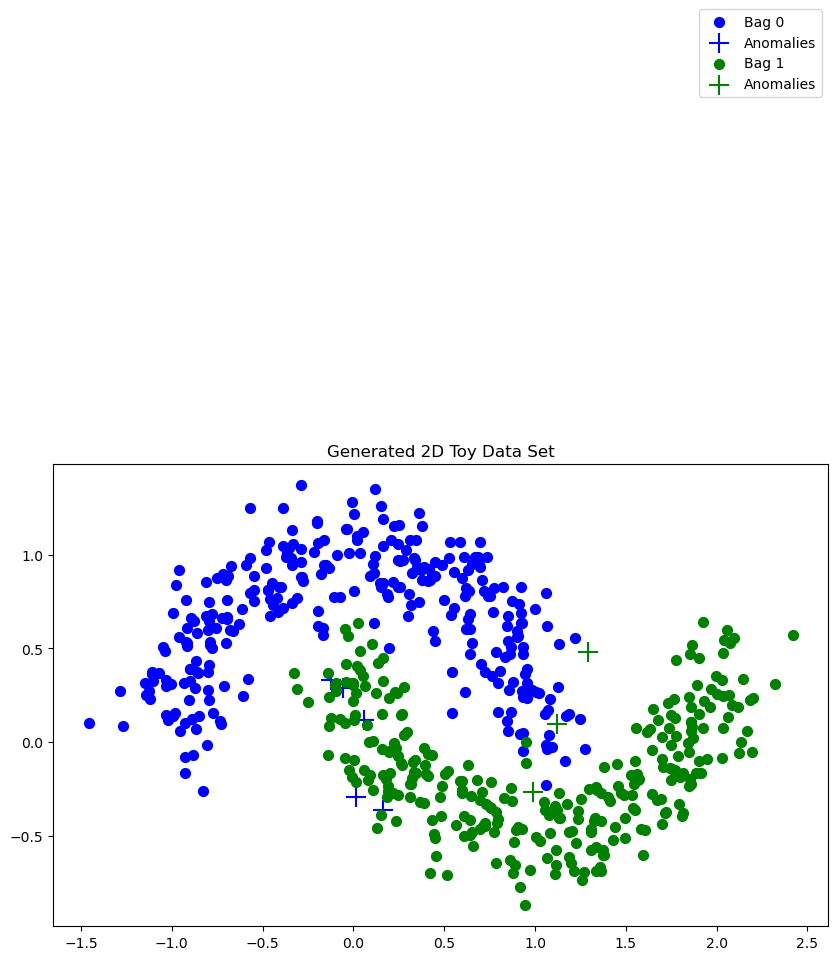

In [7]:
## Create toy data set

from itertools import cycle
cycol = cycle(clrs)

fig, ax = plt.subplots( nrows=1, ncols=1, figsize = (10,6) )  # create figure & 1 axis

for bag in range(len(bags)):
    domain = bags[bag]
    anomalies = []
    normals = []
    D[bag] = np.asarray(domain.tolist())

    for idx in range(len(domain)):
        if dataBag.isAnomaly(bag, idx):
            anomalies.append(domain[idx])
        else:
            normals.append(domain[idx])

    anomalies = np.asarray(anomalies)
    normals = np.asarray(normals)
    
    c=next(cycol)
    if bag == 0:
        if (len(normals)>0):
            ax.scatter(normals[:,0], normals[:,1], marker='.', c=c, s=200, label =  "Bag "+str(bag))#, c= 'b')
        if (len(anomalies)>0):
            ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', c=c, s=200,label = "Anomalies")#,c= 'b')
    else:
        if (len(normals)>0):
            ax.scatter(normals[:,0], normals[:,1], marker='.', c=c, s=200, label = "Bag "+str(bag))#, c= 'b')
        if (len(anomalies)>0):
            ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', c=c, s=200, label = "Anomalies")#,c= 'b')
        

'''for bag in range(len(bags)):
    domain = bags[bag]
    if (len(domain)>0):
        ax.scatter(domain[:,0], domain[:,1], c=next(cycol))'''
        

#fig.savefig('img/original.png',bbox_inches='tight')
plt.title('Generated 2D Toy Data Set')
plt.legend(bbox_to_anchor =(1, 2), ncol = 1)
plt.show()
plt.close(fig)


In [8]:
from data import Data
from methods import MABMethod
from sklearn.metrics import roc_auc_score, auc, precision_recall_curve

def getPrediction(alba: MABMethod, data: Data):
    pos = {}
    neg = {}
    probabilities = alba.predict(data, True)
    return probabilities
    '''for key in predictions.keys():
        posdummy = []
        negdummy = []
        for i in range(len(predictions[key])):
            if predictions[key][i]==-1:
                negdummy.append(data.get_domain(key)[i])
            elif predictions[key][i]==1:
                posdummy.append(data.get_domain(key)[i])
        pos[key] = np.asarray(posdummy)
        neg[key] = np.asarray(negdummy)
    return neg, pos, predictions'''

def diff2dd(A, B):
    # https://stackoverflow.com/questions/8317022/get-intersecting-rows-across-two-2d-numpy-arrays
    nrows, ncols = A.shape
    dtype={'names':['f{}'.format(i) for i in range(ncols)],
        'formats':ncols * [A.dtype]}

    C = np.setdiff1d(A.view(dtype), B.view(dtype))

    # This last bit is optional if you're okay with "C" being a structured array...
    C = C.view(A.dtype).reshape(-1, ncols)
    return C

def currentPrediction(alba, data, bags, newinstanceKey, instance, labeledPos = None, labeledNeg = None, t=0):
    

    cycol = cycle(clrs)

    fig, ax = plt.subplots( nrows=1, ncols=1 ,figsize=(16,9)) 

    


    for bag in range(len(bags)):
        domain = bags[bag]
        pos = np.asarray(labeledPos[bag])
        neg = np.asarray(labeledNeg[bag])
        domain = diff2dd(domain, pos)
        domain = diff2dd(domain, neg)
        c = next(cycol)

        if (len(domain)>0):
            ax.scatter(domain[:,0], domain[:,1], c=c)
        
        if (len(pos)>0):
            ax.scatter(pos[:,0], pos[:,1], marker = '+', c=c)
        if (len(neg)>0):
            ax.scatter(neg[:,0], neg[:,1], marker = '_', c=c)


    plt.title('Iteration '+str(t).zfill(3))
    fig.savefig('img/iteration'+str(t).zfill(3)+'.png',bbox_inches='tight')
    plt.close(fig)



    probabilities = getPrediction(alba, data)
    '''nrows = 3
    ncols = 4
    fig, axs = plt.subplots( nrows=nrows, ncols=ncols ,figsize=(16,9)) 
   
    for bag in range(len(bags)):
        ax = axs[bag//ncols, bag-ncols*(bag//ncols)]
        domain = bags[bag]
        ax.scatter(domain[:,0], domain[:,1], c =probabilities[bag], cmap = 'gray')
        if (bag == newinstanceKey):
            ax.scatter(instance[0], instance[1], c='red')


    plt.title('Iteration '+str(t).zfill(3))
    fig.savefig('colorimg/iteration'+str(t).zfill(3)+'.png',bbox_inches='tight')
    plt.close(fig)'''




    fig, ax = plt.subplots( nrows=1, ncols=1 ,figsize=(16,9)) 
    domain = np.zeros((0,2))
    prs = np.zeros((0))
    for bag in range(len(bags)):
        domain = np.concatenate((domain,bags[bag]))
        prs = np.concatenate((prs, probabilities[bag]))
    
    z = ax.scatter(domain[:,0], domain[:,1], c = prs  , cmap = 'coolwarm',  s=200, edgecolors='k')
    ax.scatter(instance[0], instance[1],c='lime',label = "Selected instance",s=400, edgecolors='k')


    scoreroc = roc_auc_score(np.rint(y_inst), prs)
    # Data to plot precision - recall curve
    precision, recall, _ = precision_recall_curve(np.rint(y_inst), prs)
    # Use AUC function to calculate the area under the curve of precision recall curve
    scorepr = auc(recall, precision)
    
    plt.title('Iteration '+str(t).zfill(3), fontsize = 16)
    rewardInfo.updateAuc("roc", scoreroc)
    rewardInfo.updateAuc("pr", scorepr)

    
    textstr = "ROC AUC = {:.10f}\nPR AUC = {:.10f}".format(scoreroc, scorepr)
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', horizontalalignment='right', bbox=props)
    
    cbar = fig.colorbar(z,ax= ax, label ="higher score = more positive")
    tick_font_size = 14
    cbar.ax.tick_params(labelsize=tick_font_size)
    plt.rcParams.update({'font.size': 14})
    ax.legend(loc = "lower right", fontsize= 14)

    fig.savefig('colorimg2/iteration'+str(t).zfill(3)+'.png',bbox_inches='tight')
    plt.close(fig)


In [9]:
## Create 2 domains
training_data = Data(nbags)
print(nbags)
print(D)
training_data.set_domains_and_labels(D)
query_budget = nbags*k#30# 30*10
alba = MABMethod(mab="rotting-swa", query_budget=query_budget, verbose=True, rewardInfo=rewardInfo , al_strategy = al_strategy)


2
{0: array([[-1.0724069 ,  0.36913104],
       [ 1.18766445,  0.15059856],
       [ 0.19615056,  0.50304767],
       [ 0.22278171,  1.15044707],
       [ 0.93366561,  0.0485291 ],
       [-0.29076623,  0.96293578],
       [-0.9262045 , -0.08037437],
       [-0.79316859,  0.64515859],
       [ 0.61295247,  0.77922582],
       [ 0.80920181,  0.38051187],
       [ 0.20783854,  1.07912209],
       [-0.57906677,  0.33709568],
       [-0.61019954,  0.24751092],
       [ 0.49805711,  0.75544683],
       [-1.05099124,  0.50493238],
       [ 0.85027976,  0.05851457],
       [ 0.27348499,  0.97030322],
       [ 0.82341389,  0.82498985],
       [ 0.54465539,  0.37547467],
       [ 0.87550136,  0.75513904],
       [-0.38762549,  1.24692175],
       [-0.73025885,  0.09755578],
       [ 0.54352824,  0.15759672],
       [-0.79732872,  0.2224112 ],
       [ 0.3802163 ,  1.15203932],
       [ 0.37784171,  0.86254542],
       [ 0.33163495,  0.9797264 ],
       [-0.92865574, -0.16722756],
       [ 0.933

In [10]:
if (original):
    t = 0  
    labeledPos = {}
    labeledNeg = {}
    for bag in range(len(bags)):
        labeledNeg[bag] = []
        labeledPos[bag] = []
    performance = []

    import warnings
    warnings.filterwarnings('ignore')

    while(t<query_budget):
        queries = alba.fit_query(training_data, True)

        #!!!!!!!
        key,idx = queries[0]
        i = 0
        while dataBag.isLabeled(key,idx):
            i+=1
            key, idx = queries[i]
            
        rewardInfo.chooseArm(key)
        key,idx = queries[i]
        instance = training_data.get_domain(key)[idx]
        lbl = dataBag.getLabel(key, idx)
        training_data.set_new_label(key, idx, lbl)
        training_data.set_last_labeled(key,idx)
        dataBag.label(key,idx)
        if (lbl == 1):
            labeledPos[key].append(instance.tolist())
        else:
            labeledNeg[key].append(instance.tolist())

        currentPrediction(alba, training_data, bags, key, instance, labeledPos,labeledNeg, t)
        
        #performance.append(dataBag.measureAccuracy(predictions))
        print(t)
        t += 1

    ## window = 10!!!

In [11]:
if original:
    import cv2
    import os

    image_folder = 'img'
    video_name = 'videoOriginal.avi'

    images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
    print(images)
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape

    video = cv2.VideoWriter(video_name, 0, 1, (width,height))

    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

    video.release()

    image_folder = 'colorimg'
    video_name = 'videocolorimgOriginal.avi'

    images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
    print(images)
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape

    video = cv2.VideoWriter(video_name, 0, 1, (width,height))

    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

    video.release()

    image_folder = 'colorimg2'
    video_name = 'videocolorimg2Original.avi'

    images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
    print(images)
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape

    video = cv2.VideoWriter(video_name, 0, 1, (width,height))

    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

    video.release()

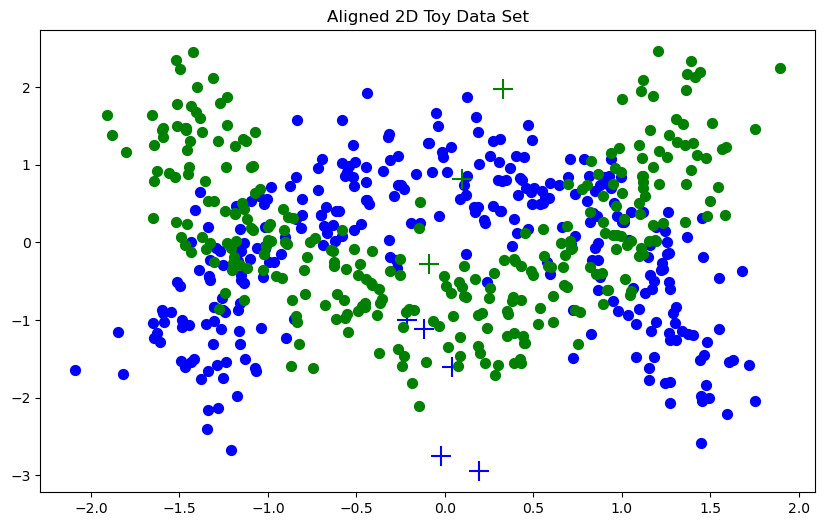

In [12]:
## NEW !!!
if not original:
    from distributionAligner import NormalAligner

    aligner = NormalAligner()
    D, X_inst = aligner.align(D)
    bags = np.array(list(D.values()))

    from itertools import cycle
    cycol = cycle(clrs)

    fig, ax = plt.subplots( nrows=1, ncols=1, figsize = (10,6) )  # create figure & 1 axis

    for bag in range(len(bags)):
        domain = bags[bag]
        anomalies = []
        normals = []
        D[bag] = np.asarray(domain.tolist())

        for idx in range(len(domain)):
            if dataBag.isAnomaly(bag, idx):
                anomalies.append(domain[idx])
            else:
                normals.append(domain[idx])

        anomalies = np.asarray(anomalies)
        normals = np.asarray(normals)
        
        c=next(cycol)
        if (len(normals)>0):
            ax.scatter(normals[:,0], normals[:,1], marker='.', c=c, s=200, label = "Bag "+str(bag))#, c= 'b')
        if (len(anomalies)>0):
            ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', c=c, s=200, label = "Anomalies")#,c= 'b')   

    '''for bag in range(len(bags)):
        domain = bags[bag]
        if (len(domain)>0):
            ax.scatter(domain[:,0], domain[:,1], c=next(cycol))'''
            

    #fig.savefig('img/original.png',bbox_inches='tight')
    plt.title('Aligned 2D Toy Data Set')
    plt.show()
    plt.close(fig)


In [13]:
## Create 2 domains
if not original:
    training_data = Data(nbags)
    print(nbags)
    print(D)
    training_data.set_domains_and_labels(D)
    query_budget = nbags*k# 30# 30*10
    alba = MABMethod(mab="rotting-swa", query_budget=query_budget, verbose=True, rewardInfo=rewardInfo , al_strategy = al_strategy)


2
{0: array([[-1.54645975, -0.89345888],
       [ 1.62868463, -1.51007214],
       [ 0.23571987, -0.51559848],
       [ 0.27313362,  1.31110966],
       [ 1.27184501, -1.79807226],
       [-0.44834311,  0.78202608],
       [-1.34106193, -2.16178751],
       [-1.15416153, -0.11461698],
       [ 0.82127936,  0.26366835],
       [ 1.09698746, -0.86134663],
       [ 0.25214016,  1.10985844],
       [-0.85337272, -0.98385014],
       [-0.89711074, -1.23662331],
       [ 0.65986439,  0.19657335],
       [-1.51637318, -0.51028055],
       [ 1.15469734, -1.76989718],
       [ 0.34436598,  0.80281412],
       [ 1.11695383,  0.39279656],
       [ 0.7253297 , -0.87555963],
       [ 1.19013083,  0.19570487],
       [-0.5844194 ,  1.58332352],
       [-1.06578048, -1.65973814],
       [ 0.72374617, -1.49032606],
       [-1.16000605, -1.30744492],
       [ 0.49431139,  1.31560237],
       [ 0.49097536,  0.4987637 ],
       [ 0.42606009,  0.82940264],
       [-1.34450564, -2.40685327],
       [ 1.272

none
Get the probabilitiies
predict_proba
predict_proba_anomaly
Get the not-probabilitiies
predict
predict
predict_proba
predict_proba_anomaly
0
Get the probabilitiies
predict_proba
predict_proba_anomaly
Get the not-probabilitiies
predict
predict
prediciton not used
prediciton not used
predict_proba
predict_proba_anomaly
1
Get the probabilitiies
predict_proba
predict_proba_anomaly
Get the not-probabilitiies
predict
predict
prediciton not used
prediciton not used
predict_proba
predict_proba_anomaly
2
Get the probabilitiies
predict_proba
predict_proba_anomaly
Get the not-probabilitiies
predict
predict
prediciton not used
prediciton not used
predict_proba
predict_proba_anomaly
3
Get the probabilitiies
predict_proba
predict_proba_anomaly
Get the not-probabilitiies
predict
predict
prediciton not used
prediciton not used
predict_proba
predict_proba_anomaly


KeyboardInterrupt: 

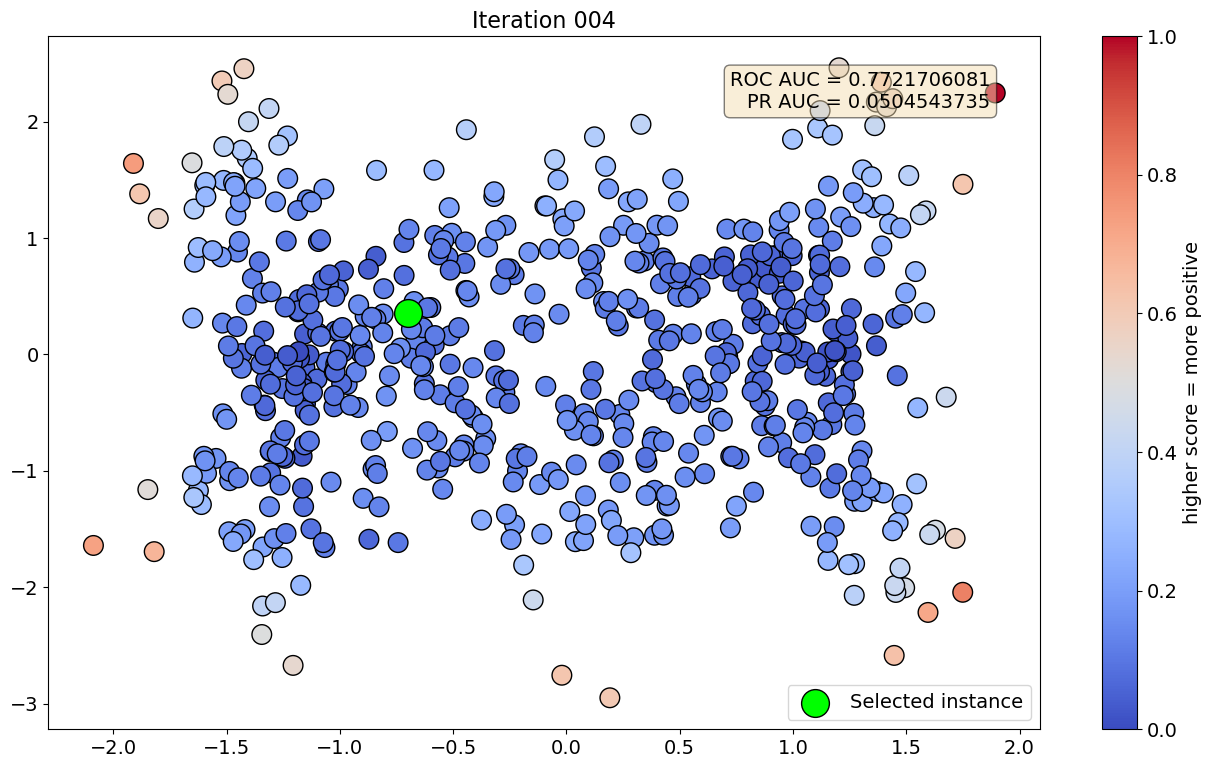

In [14]:
if not original:
    t = 0  
    labeledPos = {}
    labeledNeg = {}
    for bag in range(len(bags)):
        labeledNeg[bag] = []
        labeledPos[bag] = []
    performance = []

    import warnings
    warnings.filterwarnings('ignore')

    while(t<query_budget):
        queries = alba.fit_query(training_data, True)

        #!!!!!!!
        key,idx = queries[0]
        i = 0
        while dataBag.isLabeled(key,idx):
            i+=1
            key, idx = queries[i]
            
        rewardInfo.chooseArm(key)
        key,idx = queries[i]
        instance = training_data.get_domain(key)[idx]
        lbl = dataBag.getLabel(key, idx)
        training_data.set_new_label(key, idx, lbl)
        training_data.set_last_labeled(key,idx)
        dataBag.label(key,idx)
        if (lbl == 1):
            labeledPos[key].append(instance.tolist())
        else:
            labeledNeg[key].append(instance.tolist())

        currentPrediction(alba, training_data, bags, key, instance, labeledPos,labeledNeg, t)
        
        #performance.append(dataBag.measureAccuracy(predictions))
        print(t)
        t += 1

    ## window = 10!!!

In [ ]:
if not original:
    import cv2
    import os

    image_folder = 'img'
    video_name = 'video.avi'

    images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
    print(images)
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape

    video = cv2.VideoWriter(video_name, 0, 1, (width,height))

    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

    video.release()

    image_folder = 'colorimg'
    video_name = 'videocolorimg.avi'

    images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
    print(images)
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape

    video = cv2.VideoWriter(video_name, 0, 1, (width,height))

    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

    video.release()

    image_folder = 'colorimg2'
    video_name = 'videocolorimg2.avi'

    images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
    print(images)
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape

    video = cv2.VideoWriter(video_name, 0, 1, (width,height))

    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

    video.release()

['iteration000.png', 'iteration001.png', 'iteration002.png', 'iteration003.png', 'iteration004.png', 'iteration005.png', 'iteration006.png', 'iteration007.png', 'iteration008.png', 'iteration009.png', 'iteration010.png', 'iteration011.png', 'iteration012.png', 'iteration013.png', 'iteration014.png', 'iteration015.png', 'iteration016.png', 'iteration017.png', 'iteration018.png', 'iteration019.png', 'iteration020.png', 'iteration021.png', 'iteration022.png', 'iteration023.png', 'iteration024.png', 'iteration025.png', 'iteration026.png', 'iteration027.png', 'iteration028.png', 'iteration029.png', 'iteration030.png', 'iteration031.png', 'iteration032.png', 'iteration033.png', 'iteration034.png', 'iteration035.png', 'iteration036.png', 'iteration037.png', 'iteration038.png', 'iteration039.png', 'iteration040.png', 'iteration041.png', 'iteration042.png', 'iteration043.png', 'iteration044.png', 'iteration045.png', 'iteration046.png', 'iteration047.png', 'iteration048.png', 'iteration049.png',

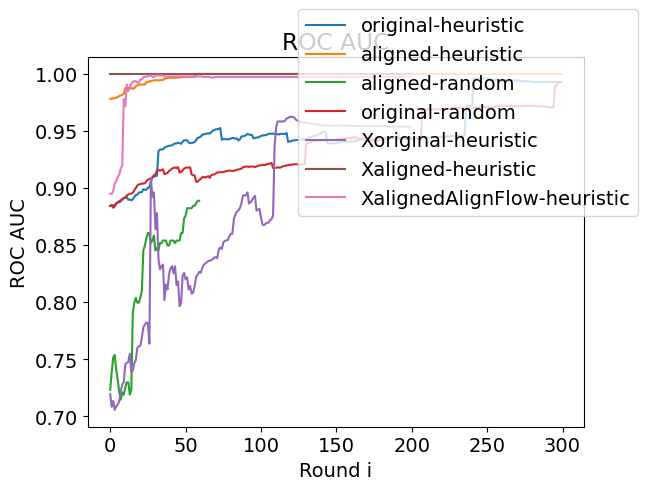

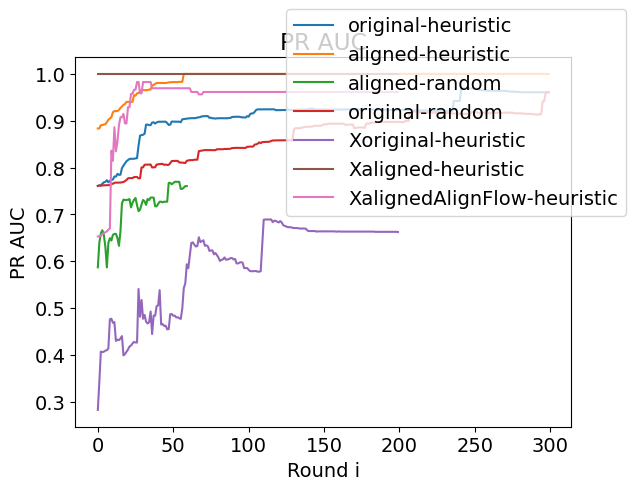

In [ ]:
fig, ax = plt.subplots( nrows=1, ncols=1)#, figsize = (16,9) ) 
scores = rewardInfo.getAUC()["roc"]
import csv
with open('auc_roc.csv', 'r') as readFile:
    reader = csv.reader(readFile)
    lines = list(reader)
    flag = True
    for i in range(len(lines)):
        if lines[i][0] == versionname:
            lines[i] = [versionname] + scores
            flag = False
    if flag:
        lines.append([versionname] + scores)
        
with open('auc_roc.csv', 'w',newline='') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(lines)

for line in lines:
    ax.plot([float(i) for i in line[1:]], label = line[0])
plt.title('ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Round i')
fig.legend()
fig.savefig('img/ROC AUC.png',bbox_inches='tight')
plt.show()
plt.close(fig)

cycol = cycle(clrs)
fig, ax = plt.subplots( nrows=1, ncols=1)#, figsize = (16,9) ) 
scores = rewardInfo.getAUC()["pr"]
import csv
with open('auc_pr.csv', 'r') as readFile:
    reader = csv.reader(readFile)
    lines = list(reader)
    flag = True
    for i in range(len(lines)):
        if lines[i][0] == versionname:
            lines[i] = [versionname] + scores
            flag = False
    if flag:
        lines.append([versionname] + scores)
        
with open('auc_pr.csv', 'w',newline='') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(lines)

for line in lines:
    ax.plot([float(i) for i in line[1:]], label = line[0])
plt.title('PR AUC')
plt.ylabel('PR AUC')
plt.xlabel('Round i')
fig.legend()
plt.show()
fig.savefig('img/PR AUC.png',bbox_inches='tight')
plt.close(fig)